<br><br><center><h1 style="font-size:4em;color:#2467C0">Week 1: Soccer Data Analysis</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://images.pexels.com/photos/1667583/pexels-photo-1667583.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from the popular site <a href="https://www.kaggle.com">Kaggle</a>. This <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database</a> has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016. 
<br>
<br>
Although we won’t be getting into the details of it for our example, the dataset even has attributes on weekly game updates, team line up, and detailed match events.
<br>
<br>
The goal of this notebook is to walk you through an end to end process of analyzing a dataset and introduce you to what we will be covering in this course. Our simple analytical process will include some steps for exploring  and cleaning our dataset, some steps for predicting player performance using basic statistics, and some steps for grouping similar clusters using machine learning. 
<br>
<br>
Let's get started with our Python journey!
</td>
</tr>
</table>

## Getting Started
<br> To get started, we will need to:
<ol>
<li>Download the data from: <a href="https://www.kaggle.com/hugomathien/soccer">https://www.kaggle.com/hugomathien/soccer</a></li>
<li>Extract the zip file called "soccer.zip"</li>
    <li>Move the extracted file `database.sqlite` to your Week 1 folder</li>
</ol>

## Import Libraries
<br> We will start by importing the Python libraries we will be using in this analysis. These libraries include:
<ul>
<li><b>sqllite3</b> for interacting with a local relational database; and</li>
<li><b>pandas</b> and <b>numpy</b> for data ingestion and manipulation.</li>
<li><b>matplotlib</b> for data visualization</li>
<li>specific methods from <b>sklearn</b> for Machine Learning and 
<li><b>customplot</b>, which contains custom functions we have written for this notebook</li>

</ul>

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from customplot import *

#### Ingest Data

Now, we will need to read the dataset using the commands below. 

<b>Note:</b> Make sure you run the import cell above (shift+enter) before you run the data ingest code below.

<b>df</b> is a variable pointing to a pandas data frame. We will learn about them in an upcoming week.

In [3]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

<h1 style="font-size:2em;color:#2467C0">Exploring Data</h1>

We will start our data exploration by generating simple statistics of the data. 
<br><br> 
Let us look at what the data columns are using a pandas attribute called "columns".

In [4]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

Next will display simple statistics of our dataset. You need to run each cell to make sure you see the outputs.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,180354.0,91995.886274,53092.657914,1.0,46074.25,92003.5,137935.75,183978.0
player_fifa_api_id,180354.0,166822.125803,52821.443279,2.0,156616.00,183792.0,200138.00,234141.0
player_api_id,180354.0,137653.145514,137599.735284,2625.0,35451.00,80291.0,192841.00,750584.0
overall_rating,180354.0,68.635317,7.027950,33.0,64.00,69.0,73.00,94.0
potential,180354.0,73.479457,6.581963,39.0,69.00,74.0,78.00,97.0
crossing,180354.0,55.142071,17.247231,1.0,45.00,59.0,68.00,95.0
finishing,180354.0,49.962136,19.041760,1.0,34.00,53.0,65.00,97.0
heading_accuracy,180354.0,57.263476,16.478716,1.0,49.00,60.0,68.00,98.0
short_passing,180354.0,62.486726,14.172493,3.0,57.00,65.0,72.00,97.0
volleys,180354.0,49.488927,18.252319,1.0,35.00,52.0,64.00,93.0


<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>
Real data is never clean. We need to make sure we clean the data by converting or getting rid of null or missing values.<br>
The next code cell will show you if any of the 183978 rows have null value in one of the 42 columns.

In [10]:
#is any row NULL ?
df.isnull().any().any(), df.shape

(False, (180354, 42))

Now let's try to find how many data points in each column are null.

In [11]:
df.isnull().sum(axis=0)

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


## Fixing Null Values by Deleting Them

In our next two lines, we will drop the null values by going through each row.


In [12]:
# Fix it

# Take initial # of rows
rows = df.shape[0]

# Drop the NULL rows
df = df.dropna()

Now if we check the null values and number of rows, we will see that there are no null values and number of rows decreased accordingly.

In [13]:
#Check if all NULLS are gone ?
print(rows)
df.isnull().any().any(), df.shape

180354


(False, (180354, 42))

To find exactly how many lines we removed, we need to subtract the current number of rows in our data frame from the original number of rows.

In [14]:
#How many rows with NULL values?

rows - df.shape[0]

0

Our data table has many lines as you have seen. We can only look at few lines at once. Instead of looking at same top 10 lines every time, we shuffle - so we get to see different random sample on top. This way, we make sure the data is not in any particular order when we try sampling from it (like taking top or bottom few rows) by randomly shuffling the rows.

In [15]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows

df = df.reindex(np.random.permutation(df.index))

<h1 style="font-size:2em;color:#2467C0">Predicting: 'overall_rating' of a player</h1>
Now that our data cleaning step is reasonably complete and we can trust and understand the data more, we will start diving into the dataset further. 

### Let's take a look at top few rows.

We will use the head function for data frames for this task. This gives us every column in every row.

In [16]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
116318,116319,181259,25644,2013-12-06 00:00:00,73.0,74.0,right,medium,high,45.0,...,58.0,62.0,72.0,75.0,68.0,12.0,6.0,8.0,13.0,6.0
181477,181478,144016,42304,2007-08-30 00:00:00,56.0,70.0,left,high,medium,41.0,...,67.0,67.0,63.0,58.0,67.0,5.0,23.0,57.0,23.0,23.0
162094,162095,189358,144993,2013-05-10 00:00:00,83.0,86.0,right,high,medium,59.0,...,81.0,70.0,14.0,15.0,21.0,11.0,9.0,8.0,9.0,13.0
30272,30273,204282,314399,2015-01-09 00:00:00,61.0,72.0,right,medium,medium,43.0,...,26.0,48.0,32.0,44.0,33.0,10.0,8.0,13.0,10.0,15.0
5363,5364,171315,38131,2016-03-03 00:00:00,71.0,71.0,right,medium,medium,75.0,...,69.0,66.0,30.0,32.0,33.0,12.0,11.0,7.0,6.0,11.0


Most of the time, we are only interested in plotting some columns. In that case, we can use the pandas column selection option as follows. Please ignore the first column in the output of the one line code below. It is the unique identifier that acts as an index for the data.<br><br>
<b>Note:</b> From this point on, we will start referring to the columns as "features" in our description.

In [17]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
116318,62.0,73.0
181477,67.0,56.0
162094,70.0,83.0
30272,48.0,61.0
5363,66.0,71.0
17992,60.0,76.0
103043,51.0,64.0
41282,41.0,63.0
73929,23.0,71.0
55289,67.0,69.0


## Feature Correlation Analysis 
Next, we will check if 'penalties' is correlated to 'overall_rating'. We are using a similar selection operation, bu this time for all the rows and within the correlation function. 

# Are these correlated (using Pearson's correlation coefficient)?

In [18]:
df['overall_rating'].corr(df['penalties'])

0.39271510791118824

We see that Pearson's Correlation Coefficient for these two columns is 0.39. <br><br>
Pearson goes from -1 to +1. A value of 0 would have told there is no correlation, so we shouldn’t bother looking at that attribute. A value of 0.39 shows some correlation, although it could be stronger. <br><br>
At least, we have these attributes which are slightly correlated. This gives us hope that we might be able to build a meaningful predictor using these ‘weakly’ correlated features.<br><br>
Next, we will create a list of features that we would like to iterate the same operation on.

## Create a list of potential Features that you want to measure correlation with

In [19]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

The for loop below prints out the correlation coefficient of "overall_rating" of a player with each feature we added to the list as potential.

In [20]:
# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


## Which features have the highest correlation with overall_rating?

Looking at the values printed by the previous cell, we notice that the to two are "ball_control" (0.44) and "shot_power" (0.43). So these two features seem to have higher correlation with "overall_rating".


<h1 style="font-size:2em;color:#2467C0">Data Visualization:</h1>
Next we will start plotting the correlation coefficients of each feature with "overall_rating". We start by selecting the columns and creating a list with correlation coefficients, called "correlations".

In [21]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [22]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [23]:
len(cols), len(correlations)

(34, 34)

We make sure that the number of selected features and the correlations calculated are the same, e.g., both 34 in this case. Next couple of cells show some lines of code that use pandas plaotting functions to create a 2D graph of these correlation vealues and column names. 

In [24]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [25]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

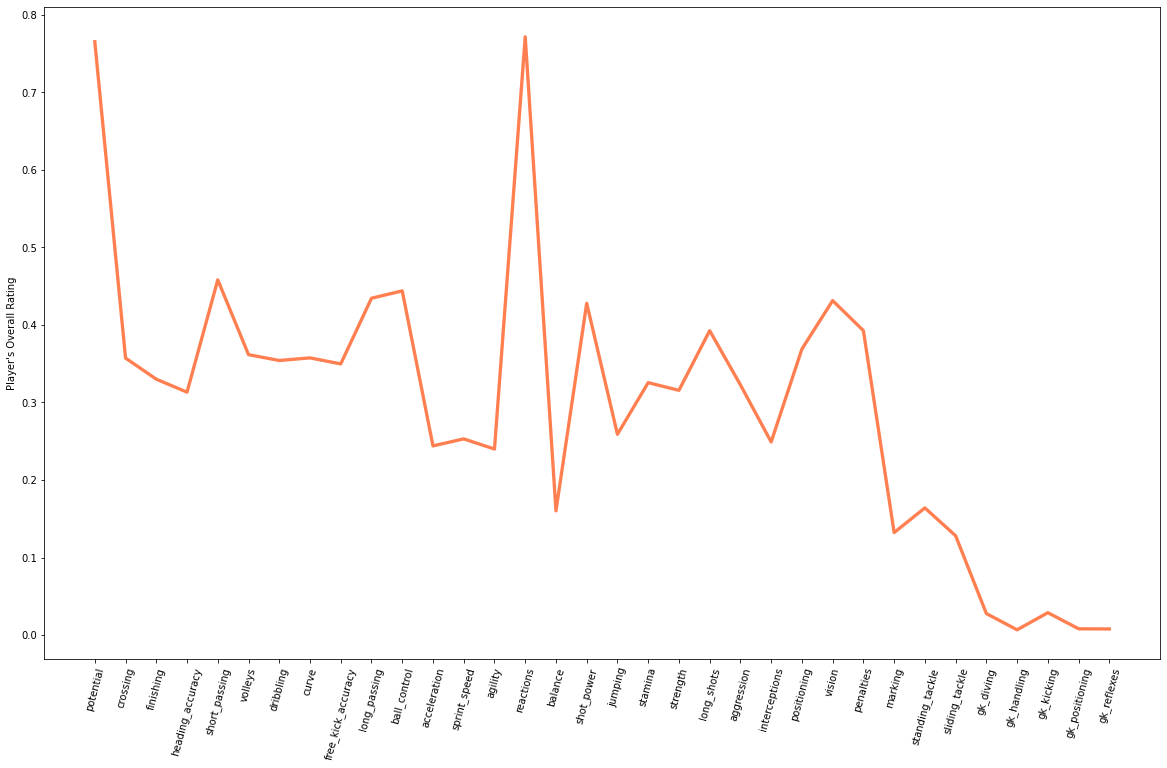

In [26]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

<h1 style="font-size:1.5em;color:#FB41C4">Analysis of Findings</h1>

Now it is time for you to analyze what we plotted. Suppose you have to predict a player's overall rating. Which 5 player attributes would you ask for?
<br><br>
<b>Hint:</b> Which are the five features with highest correlation coefficients?

<h1 style="font-size:2em;color:#2467C0">Clustering Players into Similar Groups</h1>

Until now, we used basic statistics and correlation coefficients to start forming an opinion, but can we do better? What if we took some features and start looking at each player using those features? Can we group similar players based on these features? Let's see how we can do this. 

<b>Note:</b> Generally, someone with domain knowledge needs to define which features. We could have also selected some of the features with highest correlation with overall_rating. However, it does not guarantee best outcome always as we are not sure if the top five features are independent. For example, if 4 of the 5 features depend on the remaining 1 feature, taking all 5 does not give new information.

## Select Features on Which to Group Players

In [27]:
# Define the features you want to use for grouping players

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [28]:
# Generate a new dataframe by selecting the features you just defined

df_select = df[select5features].copy(deep=True)

In [29]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
116318,8.0,74.0,72.0,72.0,75.0
181477,57.0,70.0,63.0,63.0,58.0
162094,8.0,86.0,14.0,56.0,15.0
30272,13.0,72.0,32.0,27.0,44.0
5363,7.0,71.0,30.0,37.0,32.0


## Perform KMeans Clustering

Now we will use a machine learning method called KMeans to cluster the values (i.e., player features on `gk_kicking`, `potential`, `marking`, `interceptions`, and `standing_tackle`). We will ask for four clusters. We will talk about KMeans clustering and other machine learning tools in Python in Week 7 so we won't discuss these methods here.

In [30]:
# Perform scaling on the dataframe containing the features

data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [31]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    50169
1    23791
2    50491
3    55903
dtype: int64

If you find that the below cell runs into an error, make sure you are running the latest version of `pandas` on your computer (try `pip install pandas` in your terminal). Save and restart your Jupyter session once you have updated `pandas`.

In [32]:
# Create a composite dataframe for plotting
# ... Use custom function declared in customplot.py (which we imported at the beginning of this notebook)

P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.334631,-0.844416,0.548510,0.406925,0.550846,0
1,1.921066,0.039977,-1.110596,-0.651583,-1.199826,1
2,-0.044311,0.704307,1.027820,0.982865,1.030518,2
3,-0.477051,0.105248,-0.947585,-0.975225,-0.914148,3


<h1 style="font-size:2em;color:#2467C0">Visualization of Clusters</h1>
We now have 4 clusters based on the features we selected, we can treat them as profiles for similar groups of players. We can visualize these profiles by plotting the centers for each cluster, i.e., the average values for each featuere within the cluster. We will use matplotlib for this visualization. We will learn more about matplotlib in Week 5. 

In [33]:
# For plotting the graph inside the notebook itself, we use the following command

%matplotlib inline

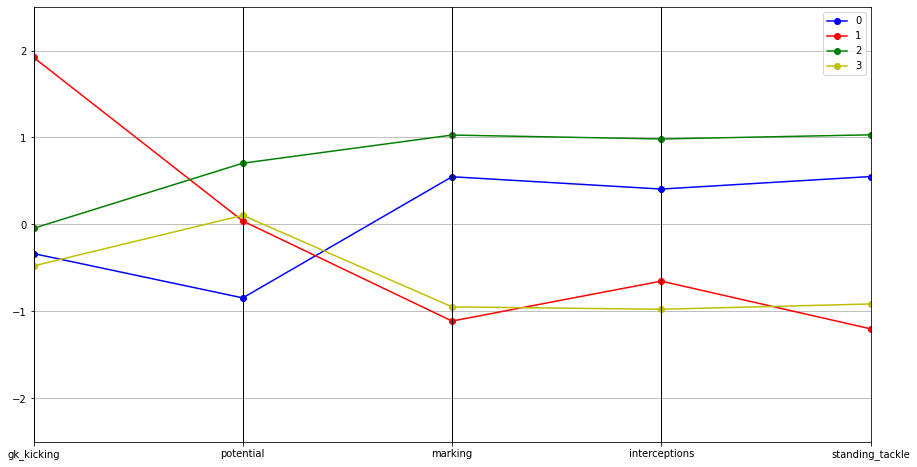

In [34]:
parallel_plot(P)

<h1 style="font-size:1.5em;color:#FB41C4">Analysis of Findings</h1>
### Can you identify the groups for each of the below?

<ul>
<li>Two groups are very similar except in `gk_kicking` - these players can coach each other on `gk_kicking`, where they differ.</li>
<li>Two groups are somewhat similar to each other except in potential.</li>
</ul>

In [39]:
1,3

(1, 3)

In [38]:
0,2

(0, 2)